# Gnerowanie danych + wizualizacja

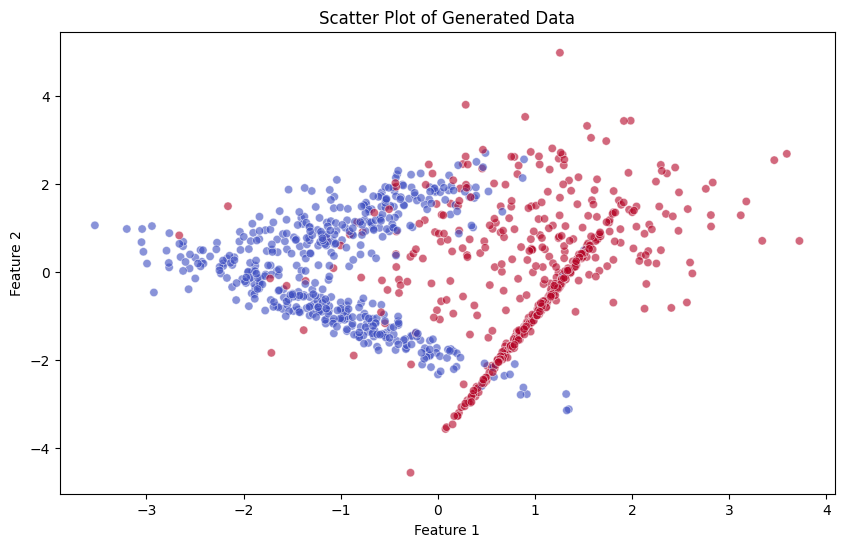

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import time
from sklearn.metrics import roc_curve, auc


# Generowanie danych
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2, random_state=None)
# Wizaulizacja danych
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Trening i testowanie + wizualizacja metryk

               Classifier  accuracy    recall  precision        f1   roc_auc  \
0              GaussianNB   0.88284  0.901920   0.869412  0.884821  0.947377   
1                     QDA   0.88504  0.901755   0.872777  0.886603  0.945985   
2  K-Neighbors Classifier   0.93304  0.918402   0.945668  0.931600  0.961332   
3                     SVC   0.92248  0.907300   0.935500  0.921010  0.954849   
4           Decision Tree   0.90104  0.901506   0.900251  0.900302  0.901296   

   train_time  test_time  
0    0.000985   0.000233  
1    0.000851   0.000241  
2    0.000928   0.013869  
3    0.042637   0.003581  
4    0.002031   0.000186  


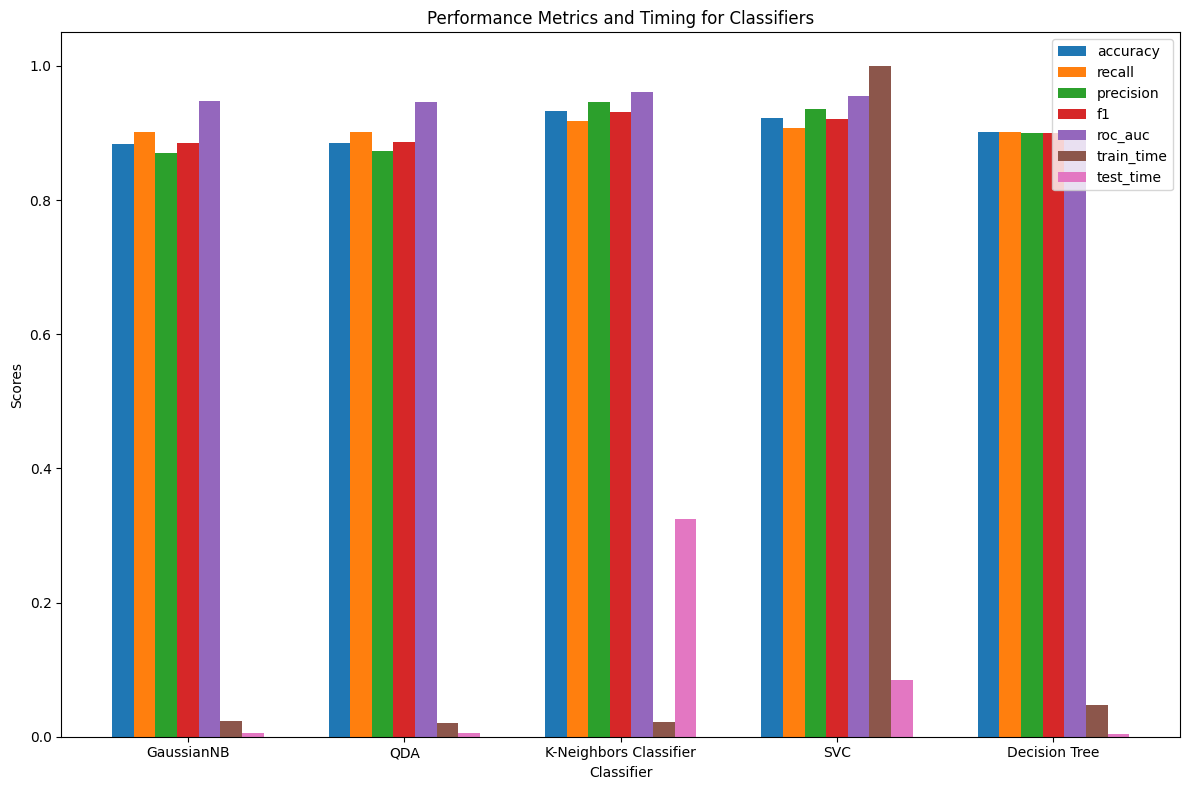

In [ ]:

# Inicjalizowanie klasyfikatorów
classifiers = {
    "GaussianNB": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}


results = []

# Trenining i testowanie
for name, clf in classifiers.items():
    metrics = {'accuracy': [], 'recall': [], 'precision': [], 'f1': [], 'roc_auc': [], 'train_time': [], 'test_time': []}

    for _ in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

        start_train = time.time()
        clf.fit(X_train, y_train)
        end_train = time.time()

        start_test = time.time()
        y_pred = clf.predict(X_test)
        end_test = time.time()

        y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else clf.decision_function(X_test)

        # Zapisywanie wybranych metryk
        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['recall'].append(recall_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred))
        metrics['f1'].append(f1_score(y_test, y_pred))
        metrics['roc_auc'].append(roc_auc_score(y_test, y_proba))
        metrics['train_time'].append(end_train - start_train)
        metrics['test_time'].append(end_test - start_test)

    # Uśrednione wartości
    averaged_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
    results.append({'Classifier': name, **averaged_metrics})



results_df = pd.DataFrame(results)
print(results_df)

#Normalizacja czasu treningu i testowania dla wizulaizacji
max_time = max(results_df['train_time'].max(), results_df['test_time'].max())
results_df['train_time'] /= max_time
results_df['test_time'] /= max_time

# Wziualizacja wyników
n_groups = len(results_df)
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(n_groups)
bar_width = 0.1

for i, metric in enumerate(['accuracy', 'recall', 'precision', 'f1', 'roc_auc', 'train_time', 'test_time']):
    plt.bar(index + i * bar_width, results_df[metric], bar_width, label=metric)

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Performance Metrics and Timing for Classifiers')
plt.xticks(index + bar_width * 3, results_df['Classifier'])
plt.legend()

plt.tight_layout()
plt.show()


# Wizualizacja predykcji

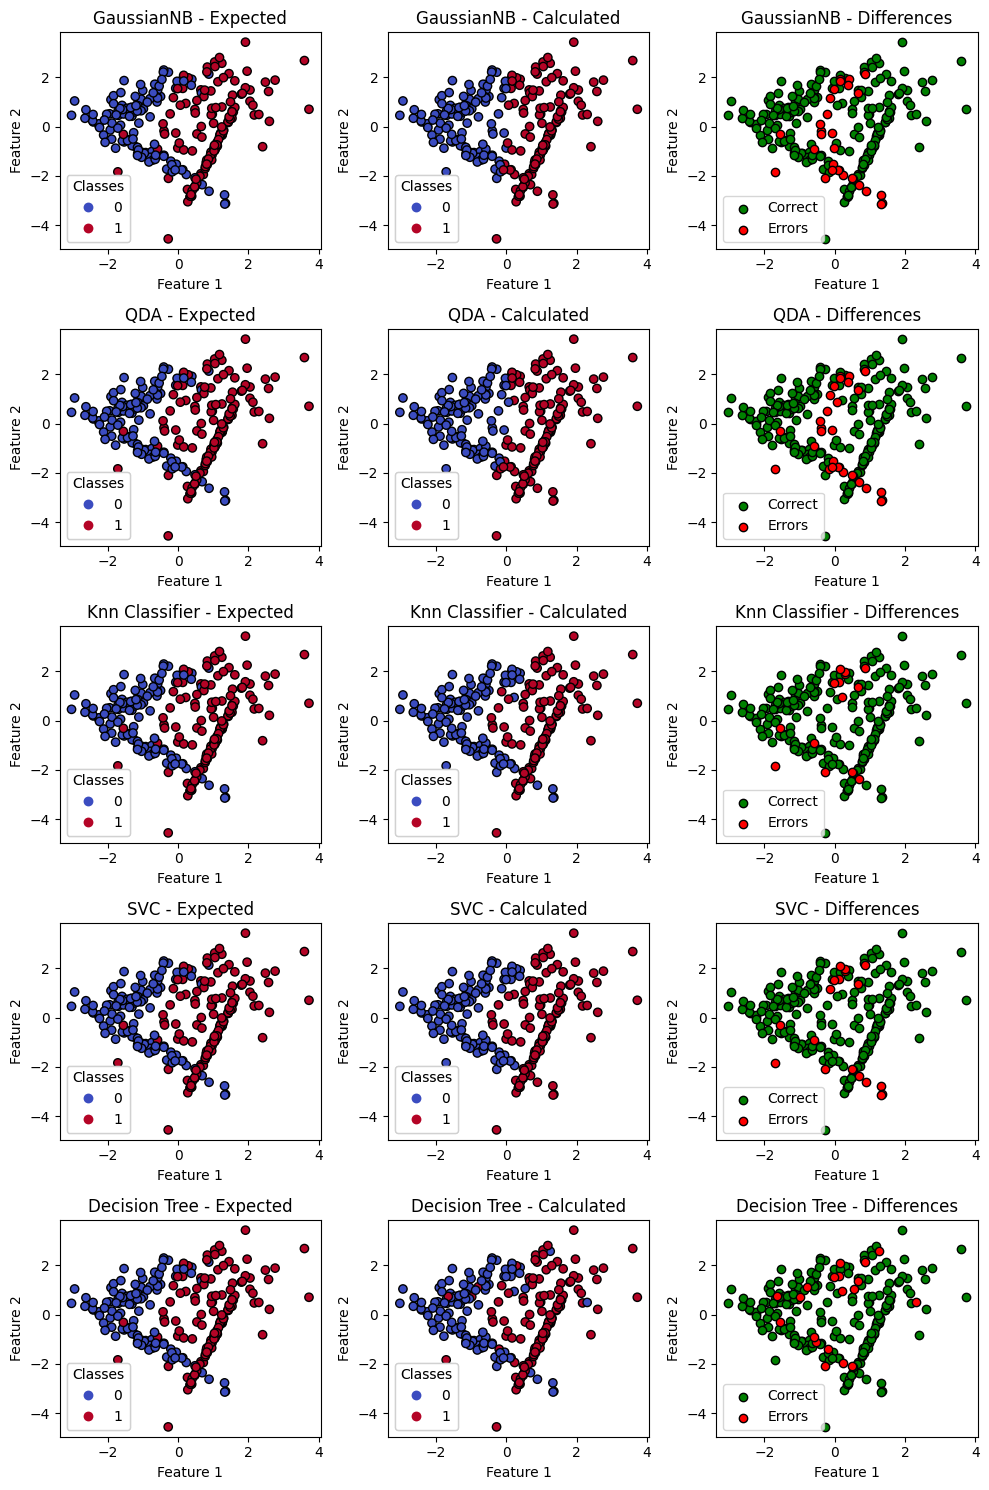

In [ ]:


classifiers = {
    "GaussianNB": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Knn Classifier": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}


n_classifiers = len(classifiers)
fig, axs = plt.subplots(n_classifiers, 3, figsize=(10, 3 * n_classifiers))

for ax, (name, clf) in zip(axs, classifiers.items()):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    scatter = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k')
    ax[0].set_title(f'{name} - Expected')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    legend1 = ax[0].legend(*scatter.legend_elements(), title="Classes")
    ax[0].add_artist(legend1)


    scatter = ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
    ax[1].set_title(f'{name} - Calculated')
    ax[1].set_xlabel('Feature 1')
    ax[1].set_ylabel('Feature 2')
    legend2 = ax[1].legend(*scatter.legend_elements(), title="Classes")
    ax[1].add_artist(legend2)


    correct = y_test == y_pred
    ax[2].scatter(X_test[correct, 0], X_test[correct, 1], color='green', label='Correct', edgecolor='k')
    ax[2].scatter(X_test[~correct, 0], X_test[~correct, 1], color='red', label='Errors', edgecolor='k')
    ax[2].set_title(f'{name} - Differences')
    ax[2].set_xlabel('Feature 1')
    ax[2].set_ylabel('Feature 2')
    ax[2].legend()

plt.tight_layout()
plt.show()


# ROC wykres

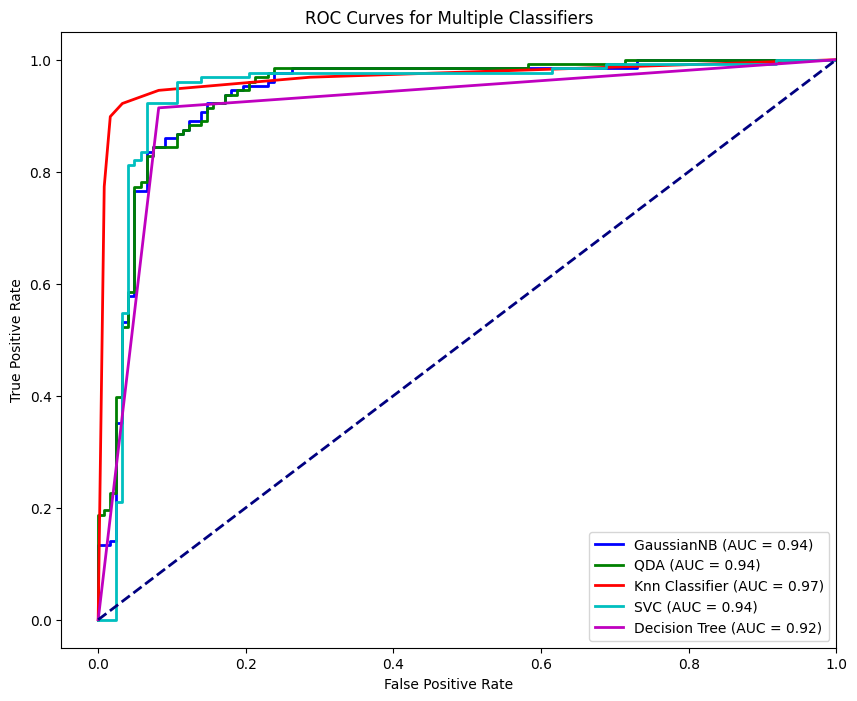

In [ ]:


plt.figure(figsize=(10, 8))
colors = iter(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

# ROC dla każdego klasyfikatora
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=next(colors), lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

#losowy klasyfikator linia
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()


# Obszary decyzyjne

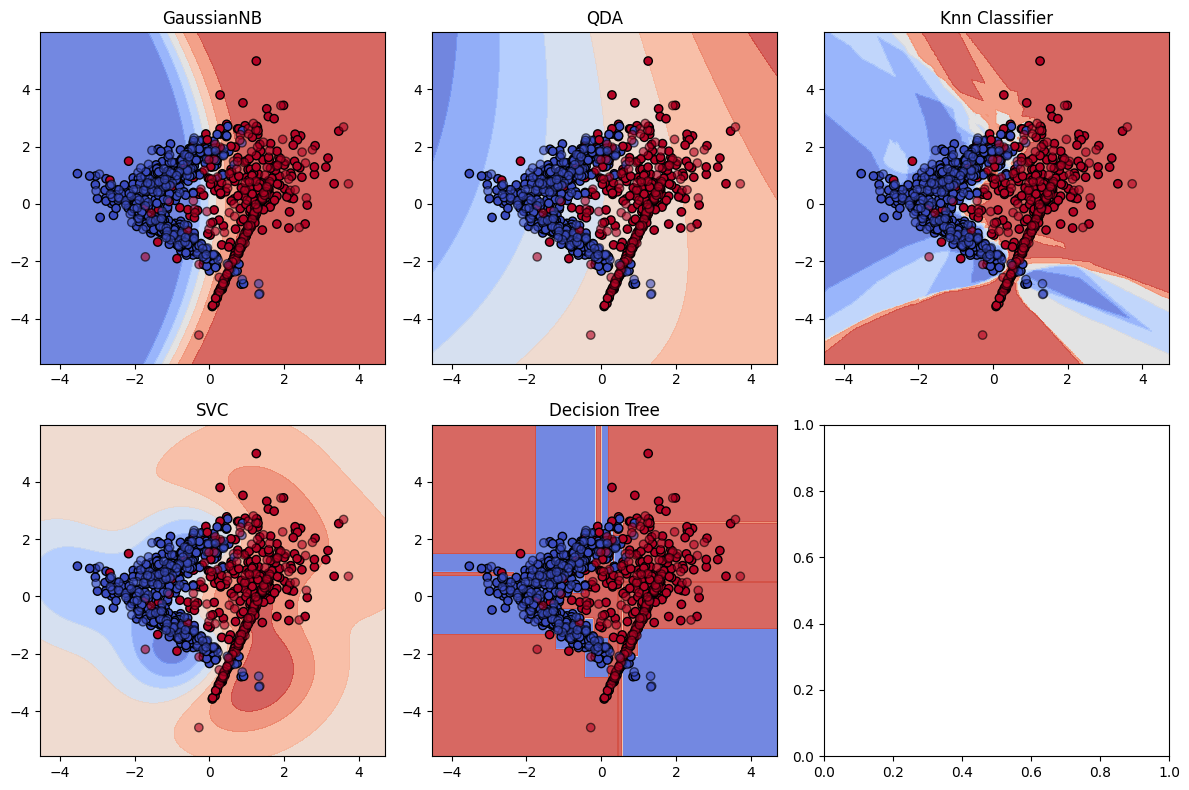

In [ ]:


h = .02 # kolor mapa przejście
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

for i, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]


    Z = Z.reshape(xx.shape)
    axs[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)
    axs[i].set_xlim(xx.min(), xx.max())
    axs[i].set_ylim(yy.min(), yy.max())
    axs[i].set_title(name)

plt.tight_layout()
plt.show()


# Przeszukiwanei parametrów

Best parameters: {'n_neighbors': 29, 'p': 2}
Best cross-validation score (ROC AUC): 0.9443893489348936


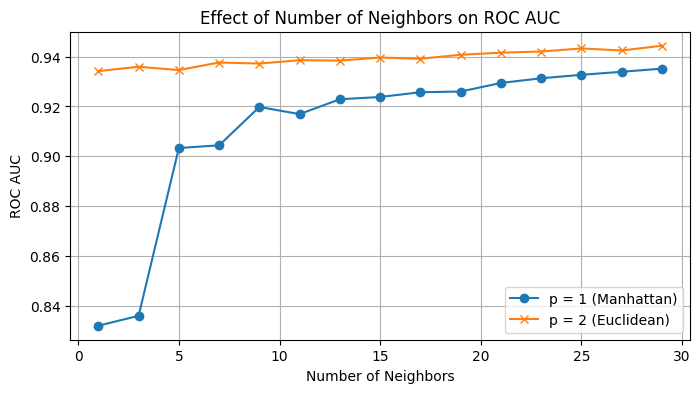

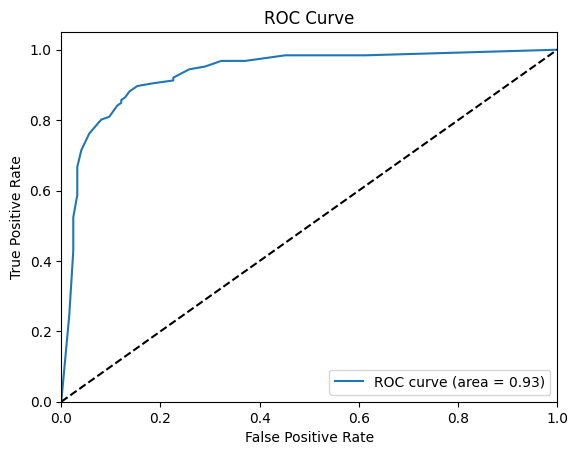

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc


X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2, random_state=None)

param_grid = {
    'n_neighbors': np.arange(1, 30, 2),
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (ROC AUC):", grid_search.best_score_)

scores = grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(8, 4))
plt.plot(param_grid['n_neighbors'], scores[:len(param_grid['n_neighbors'])], marker='o')
plt.plot(param_grid['n_neighbors'], scores[len(param_grid['n_neighbors']):], marker='x')
plt.xlabel('Number of Neighbors')
plt.ylabel('ROC AUC')
plt.title('Effect of Number of Neighbors on ROC AUC')
plt.legend(['p = 1 (Manhattan)', 'p = 2 (Euclidean)'])
plt.grid(True)
plt.show()


best_knn = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


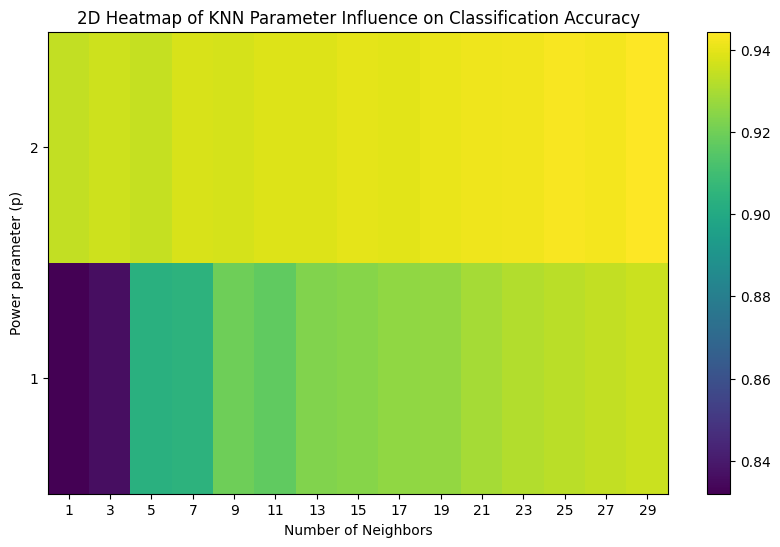

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['p']), len(param_grid['n_neighbors']))

scores_df = pd.DataFrame(scores, index=param_grid['p'], columns=param_grid['n_neighbors'])

plt.figure(figsize=(10, 6))
plt.title('2D Heatmap of KNN Parameter Influence on Classification Accuracy')
heatmap = plt.pcolor(scores_df, cmap='viridis')
plt.colorbar(heatmap)

plt.xlabel('Number of Neighbors')
plt.ylabel('Power parameter (p)')
plt.xticks(np.arange(0.5, len(scores_df.columns), 1), scores_df.columns)
plt.yticks(np.arange(0.5, len(scores_df.index), 1), scores_df.index)

plt.show()
